---
# Missing data and aggregations exercises
Date: 20/10/2021

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

Check the [questions][link]

[link]: https://github.com/kokchun/Databehandling-21/blob/main/Exercises/E01_missing_aggregation.ipynb


---

## 1. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame

&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns()
```

&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 

&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

&nbsp; e) Find all rows where the freetime is NaN.   

&nbsp; f) Find all rows where the freetime **or** the age is NaN.  

&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

<details>
<summary>Hint</summary>

&nbsp; c) Use 
```py
isnull()
```
in combination with aggregation functions such as 
```py
sum()
```

Use seaborn to plot

f) use bitwise or: | 


</details>

<br/>

<details>

<summary>Answer</summary>

d)

![null values graph](../assets/null_vals_student.png)

e) 

These row indices: 
[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]
 
f) 

These row indices:
[20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]

g) 

These rows constitutes 0.0127 of the dataset

h)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

</details>

In [1]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv("../../Data/student-mat-missing-data.csv", index_col=0)
df_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10


In [2]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         381 non-null    float64
 3   address     390 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [3]:
df_1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,381.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,379.000000,390.000000,395.000000,395.000000,390.000000,390.000000,395.000000,395.000000,395.000000
mean,16.700787,2.749367,2.521519,1.448101,2.035443,0.334177,3.943590,3.237467,3.120513,1.481013,2.291139,3.548718,5.569231,10.908861,10.713924,10.415190
std,1.275157,1.094735,1.088201,0.697505,0.839240,0.743651,0.896665,0.990201,1.112370,0.890741,1.287897,1.394604,7.232395,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [4]:
df_1["Mjob"].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [5]:
df_1["school"].unique()

array(['GP', 'MS'], dtype=object)

In [6]:
df_1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df_1.isna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_1.isnull().sum()

school         0
sex            0
age           14
address        5
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         5
freetime      16
goout          5
Dalc           0
Walc           0
health         5
absences       5
G1             0
G2             0
G3             0
dtype: int64

In [2]:
missings = df_1.isnull().sum()
missings_dataframe = pd.DataFrame({"n_of_missings":missings})
missings_dataframe.head()

,n_of_missings
school,0
sex,0
age,14
address,5
famsize,0


# d)

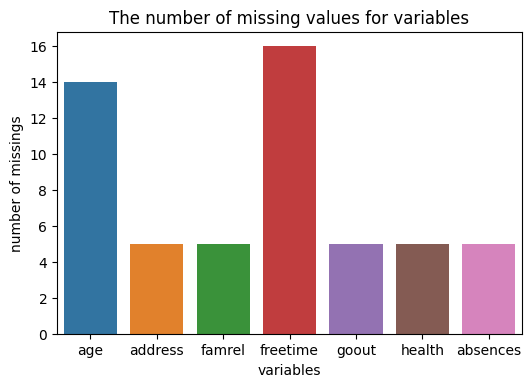

In [3]:
from data_utils import barplot_missing_data
barplot_missing_data(df_1)

#### e) Find all rows where the freetime is NaN.

In [4]:
#https://www.statology.org/pandas-get-index-of-row/
freetime_missings_index = df_1.index[df_1["freetime"].isna()].tolist()
print(f" The rows where the freetime is NaN: {freetime_missings_index}")

 The rows where the freetime is NaN: [87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]


#### f) Find all rows where the freetime or the age is NaN

In [5]:
freetime_age_missings_index = df_1.index[df_1["freetime"].isna()|df_1["age"].isna()].tolist()
print(f" The rows where the freetime and age is NaN: {freetime_age_missings_index}")

 The rows where the freetime and age is NaN: [20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


#### g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

In [6]:
# https://stackoverflow.com/questions/59349484/why-does-df-isnull-sum-work-the-way-it-does
df_missings_across_columns = pd.DataFrame({"sum missings across columns": df_1.isna().sum(1)})
df_missings_pairwise = df_missings_across_columns[df_missings_across_columns["sum missings across columns"]>1]
df_missings_pairwise


,sum missings across columns
160,7
191,7
276,7
293,7
385,7


In [7]:
proporation = len(df_missings_pairwise)/len(df_1)
print(f"These rows constitutes {proporation:.4f} of the dataset")
#https://datascienceparichay.com/article/get-the-number-of-rows-in-a-pandas-dataframe/

These rows constitutes 0.0127 of the dataset


---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 

&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.

&nbsp; d) The column higher seems interesting. Let's see which unique values it can have. 

&nbsp; e) Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

&nbsp; g) Make a barchart for alcohol consumption vs age.

&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution


<details>
<summary>Answer</summary>

a)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

b)

![Age distribution](../assets/age_distribution_student.png)

c)

```python

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
```

d)

```python

array(['yes', 'no'], dtype=object)

```

e)

![Age distribution with higher](../assets/age_dist_higher.png)

f) 

```python

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 390, dtype: int64

```

g)

![Age distribution vs alcohol](../assets/alcohol_age.png)

</details>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.

In [9]:
#Now remove all pairwise missing rows and use missing-value utility function visualize the remaining NaNs.
df_remove_missings_pairwise = df_1.drop(index=df_missings_pairwise.index)
df_remove_missings_pairwise

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


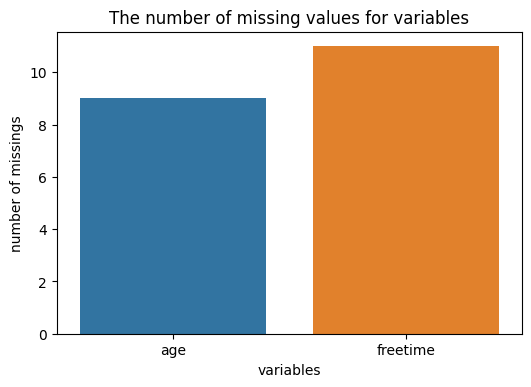

In [10]:
from data_utils import barplot_missing_data

barplot_missing_data(df_remove_missings_pairwise)

b) The domain expert has told you that you have to fill in the missing age values. Start with visualising the age distribution in the dataset using a histogram.

Text(0.5, 1.0, 'The age distribution.')

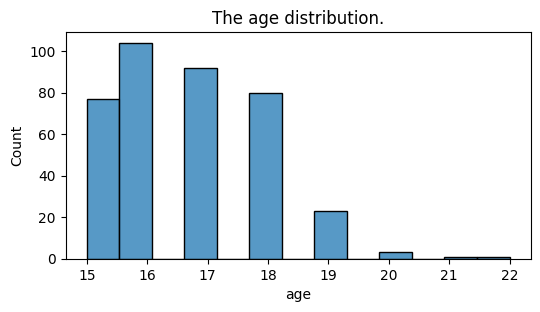

In [14]:
fig, ax = plt.subplots(dpi=100, figsize=(6,3))
sns.histplot(data=df_remove_missings_pairwise["age"]).set_title("The age distribution.")

In [15]:
df_remove_missings_pairwise["age"]

0      18.0
1      17.0
2      15.0
3      15.0
4      16.0
       ... 
390    20.0
391    17.0
392    21.0
393    18.0
394    19.0
Name: age, Length: 390, dtype: float64

c) Check which columns there are in the dataset to see what can be utilised in determining the age.

In [17]:
df_remove_missings_pairwise.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

d) The column higher seems interesting. Let's see which unique values it can have.

In [20]:
df_remove_missings_pairwise["higher"].unique()

array(['yes', 'no'], dtype=object)

 e) Let's see if we can see some connection between age distribution and higher. Make 3 subplots of age histograms:

Plot 1: same as b)
Plot 2: age distribution when higher is yes
Plot 3: age distribution when higher is no

ValueError: The following variable cannot be assigned with wide-form data: `hue`

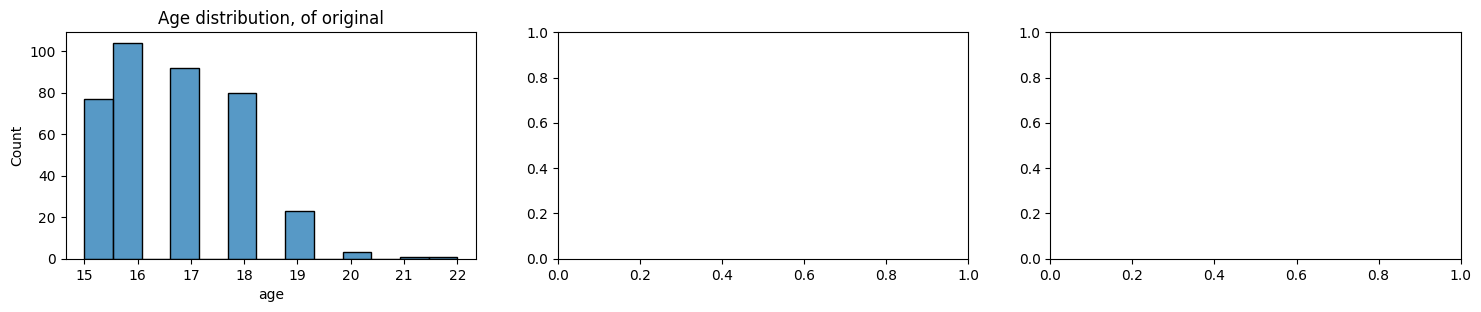

In [37]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(18,3))
sns.histplot(data=df_remove_missings_pairwise["age"], ax=ax[0]).set_title("Age distribution, of original")

age_higher_yes = df_remove_missings_pairwise[df_remove_missings_pairwise["higher"]=="yes"]
sns.histplot(data=age_higher_yes["age"], ax=ax[1]).set_title("Age distribution, of original")
sns.histplot(data=df_remove_missings_pairwise["age"], ax=ax[0]).set_title("Age distribution, of original")




---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---